# Représentation de Fresnel d'une somme de deux sinusoïdes

On considère deux sinsusoïdes :
$$s_1(t) = S_m \cos(\omega t + \varphi_1) 
\qquad
\text{et}
\qquad
s_2(t) = S_m \cos(\omega t + \varphi_2) .
$$

Leur somme $s(t) = s_1(t) + s_2(t)$ est maximale lorsque $$\varphi_1 = \varphi_2 + 2 p \pi \quad \text{avec} \quad p \in \mathbb{Z}.$$

Leur $s(t)$ s'annule  lorsque $$\varphi_1 = \varphi_2 + \left(2 p + \frac{1}{2}\right) \pi \quad \text{avec} \quad p \in \mathbb{Z}.$$


Ce résultat se visualise très bien en représentation de Fresnel.

In [10]:
%matplotlib notebook
# Librairies pour l'interaction
from ipywidgets import interact, FloatSlider, Layout
import ipywidgets as widgets

In [11]:
# Librairies usuelles
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Définition des sinusoïdes
Sm = 2
f0 = 3

def s1(t, phi1):
    return Sm*np.cos(2*np.pi*f0*t + phi1)

def s2(t, phi2):
    return Sm*np.cos(2*np.pi*f0*t + phi2)

<IPython.core.display.Javascript object>


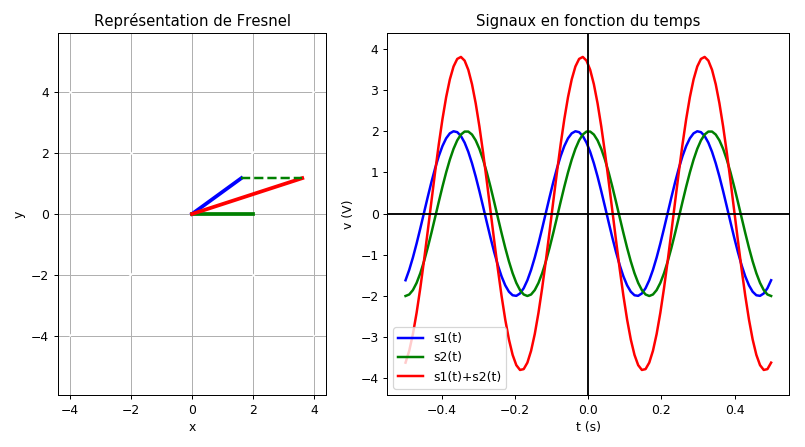

interactive(children=(FloatSlider(value=0.0, description='phi1', layout=Layout(width='100%'), max=3.1415926535…

<function __main__.update(phi1, phi2)>

In [13]:
# Initialisation des graphiques
f, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw = {'width_ratios':[2, 3]}, figsize=(9,5))

# Représentations temporelles

tmin = -.5
tmax = .5
npoints = 100
t = np.linspace(tmin, tmax, npoints)

# Phases initiales
phi10 = 0
phi20 = 0

l1, = ax1.plot(t,s1(t,phi10), lw=2, color='blue', label="s1(t)")
l2, = ax1.plot(t,s2(t,phi20), lw=2, color='green', label="s2(t)")
l3, = ax1.plot(t,s1(t,phi10)+s2(t,phi20), lw=2, color='red', label="s1(t)+s2(t)")

plt.legend()
plt.xlabel("t (s)")
plt.ylabel("v (V)")
ax1.axvline(0, color="k")
ax1.axhline(0, color="k")
ax1.set_title('Signaux en fonction du temps')

# Représentations de Fresnel

# Astuce pour la mise à l'échelle initiale
ax0.plot([-2*Sm, 2*Sm],[-2*Sm, 2*Sm],color='white')
ax0.plot([-2*Sm, 2*Sm],[2*Sm, -2*Sm],color='white')

# Les représentations de fresnel elles-mêmes
f1, = ax0.plot([0, Sm*np.cos(phi10)], [0, Sm*np.sin(phi10)], lw=3, color="blue")
f2, = ax0.plot([0, Sm*np.cos(phi20)], [0, Sm*np.sin(phi20)], lw=3, color="green")
f3, = ax0.plot([0, Sm*np.cos(phi10)+Sm*np.cos(phi20)], [0, Sm*np.sin(phi20)+Sm*np.sin(phi20)], lw=3, color="red")
f4, = ax0.plot([Sm*np.cos(phi10), Sm*(np.cos(phi10)+np.cos(phi20))],
               [Sm*np.sin(phi10), Sm*(np.sin(phi10)+np.sin(phi20))], "--",lw=2,color="green")

ax0.set_title('Représentation de Fresnel')
ax0.set_xlabel("x")
ax0.set_ylabel("y")
ax0.grid()
ax0.axis('equal')


f.tight_layout()

def update(phi1, phi2):
    """Met à jour le graphique"""
    l1.set_data(t, s1(t,phi1))
    l2.set_data(t, s2(t,phi2))
    l3.set_data(t, s1(t,phi1) + s2(t,phi2))
    f1.set_data([0, Sm*np.cos(phi1)], [0, Sm*np.sin(phi1)])
    f2.set_data([0, Sm*np.cos(phi2)], [0, Sm*np.sin(phi2)])
    f3.set_data([0, Sm*np.cos(phi1)+Sm*np.cos(phi2)], [0, Sm*np.sin(phi1)+Sm*np.sin(phi2)])
    f4.set_data([Sm*np.cos(phi1), Sm*(np.cos(phi1)+np.cos(phi2))], [Sm*np.sin(phi1), Sm*(np.sin(phi1)+np.sin(phi2))])



N = 20
phi1_widget = FloatSlider(min=-np.pi, max=np.pi, value=0, step=np.pi/N, layout=Layout(width='100%'))
phi2_widget = FloatSlider(min=-np.pi, max=np.pi, value=np.pi/2, step=np.pi/N, layout=Layout(width='100%'))

interact(update,phi1=phi1_widget, phi2=phi2_widget)
